# Caso práctico 1: ¿Cómo lograr el éxito rápido de un negocio de bicicletas compartidas?

## Introducción

El siguiente caso de estudio introduce un procedimiento de análisis para la empresa de bicicletas compartidas Cyclistic ubicada en la ciudad de Chicago. El escenario planteado es el siguiente:

 + La directora de marketing cree que el éxito futuro de la empresa depende de maximizar la cantidad
de membresías anuales.

 + Por lo tanto, tu equipo quiere entender qué diferencias existen en el uso de las bicicletas Cyclistic
entre los ciclistas ocasionales y los miembros anuales.

 + A través de estos conocimientos, tu equipo diseñará una nueva estrategia de marketing para convertir a los ciclistas ocasionales en miembros anuales.

A través de los *insights* obtenidos se busca generar una serie de recomendaciones inferidas a partir de los datos que permitan a Cyclistic maximizar la cantidad de membresías anuales y convertir a la mayor cantidad posibles de ciclistas ocasionales en miembros anuales.


## Consideraciones

 + Bicicletas: 5,800 bicicletas y 600 estaciones. 
 + Ofrecen además de bicicletas convencionales y compartidas, bicicletas tipo reclinadas, triciclos manuales y bicicletas de carga. 
 + La mayoría de ciclistas eligen las convencionales, con un 8% eligiendo las opciones asistidas. 
 + Existe una propensión a usar las bibicletas de forma recreativa, pero un 30% las usa para trabajar.
 + Se tienen 3 planes: pases de un solo viaje, de día completo y membresías anuales.
 + Los clientes de un solo viaje o día se llaman *ciclistas ocasionales*.
 + Los miembros con membresías anuales se llaman *miembros de Cyclistic*.
 + Los analistas financieron apelan a convertir a la mayor cantidad de ocasionales en miembros para maximizar las ganancias, ya que los miembros son los más rentables para la compañía. 

## Preguntar

+ ¿En qué aspectos se diferencían los miembros de Cyclistic y los ciclistas ocasionales con respecto a sus tendencias de uso de bicicletas para sus viajes?
+ ¿Qué factores podrían propiciar que los ocasionales se decanten por una membresía anual?
+ ¿Cómo podría utilizar Cyclistic los medios digitales para influenciar a los ciclistas ocasionales a adquirir una membresía anual?

Para este análisis, nos enfocaremos en la primera pregunta. En este punto, lo que se busca conocer a partir del análisis es establecer **una diferencia clara entre las tendencias de consumo que existen entre los ciclistas ocasionales y los miembros** para obtener una caracterización de sus patrones de viajes y uso de las bicicletas. 

Este conocimiento resulta relevante ya que, al conocer las características de los miembros actuales, se pueden delimitar las características diferenciadoras entre ambas muestras que, dependiendo de cada ciclista ocasional, puedan resultar críticas o no para decantarse por una membresía.

### Tareas clave

1. Nuestra tarea de negocio principal es delimitar las características que diferencían a los ciclistas ocasionales de los miembros.
2. El equipo de Marketing usará esta información para generar campañas que incentiven a los ciclistas ocasionales a adquirir una membresía.
3. Se considera que, a partir de los análisis financieros, los miembros son los usuarios más rentables y de acuerdo a las observaciones de Lily Moreno el éxito financiero de la empresa depende de maximizar la cantidad de estos usuarios.

### Preparar

+ ¿Dónde se ubican los datos?: los datos han sido descargados del siguiente [repositorio](https://divvy-tripdata.s3.amazonaws.com/index.html), de donde se han descargado los 12 históricos correspondientes a los 12 meses del año 2022.
+ ¿Cómo están organizados los datos?: estos se encuentran organizados en una serie de archivos .csv
+ ¿Los datos cumplen con el criterio ROCCC?: para el caso de estudio se asume que los datos provienen de una fuente primaria (Cyclistic), son originales en el sentido de que provienen de los datos de consumo de sus clientes, su integridad a vista previa parece correcta, y su recolección es reciente. Por tanto, contamos con una fuente confiable y sin sesgos aparentes.
+ Autorización, privacidad y seguridad: para los objetivos del análisis, se ha autorizado el acceso a los datos de los viajes realizados por los ciclistas, los cuales ya han sido previamente anonimizados para evitar una vulneración a su privacidad. Para este caso, se asume que Cyclistic cuenta con políticas de seguridad que impide que estos datos no sean manipulados por terceros no autorizados. 
+ La verificación inicial se hace a partir de revisar previamente los archivos .csv, mientras que la verificación exhaustiva se mostrará a detalle en la sección de Procesamiento.
+ Al tratarse de datos recientes y confiables, es posible conocer a partir de ellos tendencias actuales y vigentes.
+ A simple vista, la fuente de datos parece encontrarse en orden. Se documentarán inconvenientes posteriormente en caso de presentarse.

Los datos han sido descomprimidos y almacenados en una carpeta llamada *Data* en el repositorio de este análisis. Procedemos a cargar cada uno de los archivos y realizar un breve análisis exploratorio de sus características.

In [1]:
# Sección de importación de bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
from time import strftime
from time import gmtime
%matplotlib inline

In [2]:
df1 = pd.read_csv("Data/202201-divvy-tripdata.csv")
df2 = pd.read_csv("Data/202202-divvy-tripdata.csv")
df3 = pd.read_csv("Data/202203-divvy-tripdata.csv")
df4 = pd.read_csv("Data/202204-divvy-tripdata.csv")
df5 = pd.read_csv("Data/202205-divvy-tripdata.csv")
df6 = pd.read_csv("Data/202206-divvy-tripdata.csv")
df7 = pd.read_csv("Data/202207-divvy-tripdata.csv")
df8 = pd.read_csv("Data/202208-divvy-tripdata.csv")
df9 = pd.read_csv("Data/202209-divvy-publictripdata.csv")
df10 = pd.read_csv("Data/202210-divvy-tripdata.csv")
df11 = pd.read_csv("Data/202211-divvy-tripdata.csv")
df12 = pd.read_csv("Data/202212-divvy-tripdata.csv")

Se observan que los datos presentan una estructura relativamente coherente en cuanto a la nomenclatura de los históricos (a excepción del mes de noviembre que añade la leyenda *public*).

Ahora, obtendremos una previa de ellos antes de proceder con una fusión de datos accediendo al atributo .dtypes de cada dataframe para verificar coherencia entre columnas y tipos de dato de cada una.

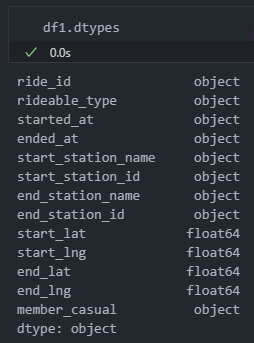


In [3]:
# Para cada dataframe se accede a su atributo .dtypes para verificar la coherencia entre ellos.
df12.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
# Añadimos cada dataframe en una lista para imprimir de cada uno su estructura renglón-columna.
df_list= [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

# Al fusionar, deberíamos tener (5667717, 13)
for df in df_list:
    print(df.shape)

(103770, 13)
(115609, 13)
(284042, 13)
(371249, 13)
(634858, 13)
(769204, 13)
(823488, 13)
(785932, 13)
(701339, 13)
(558685, 13)
(337735, 13)
(181806, 13)


Con la coherencia verificada, procedemos a concatener los dataframes en uno solo.

In [5]:
df_list= [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(df_list)
df.shape

(5667717, 13)

## Procesar

Con los dataframes concatenados en uno solo, procederemos a llevar a cabo un análisis exploratorio de datos para verificar tanto la estructura, integridad de los datos, distribuciones y correlaciones presentes en el mismo. Al llevar a cabo este procedimiento, podemos obtener un panorama más claro en caso de presentarse errores en los datos; ya sean mediciones erroneas o valores nulos.

### 1. Descripción de la estructura de datos

Verificamos nuevamente tanto la estructura general obtenida como los tipos de datos de las columnas.

In [6]:
df.shape

(5667717, 13)

In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### 2. Identificación de datos faltantes

A continuación, vamos a verificar si se encuentran valores nulos en el dataframe.

In [8]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

Los datos presentan un grave problema de nulos a lo largo de todo el dataset. Para este caso de estudio, se asume que se ha solicitado intervención del departamento correspondiente para solicitar asistencia de qué debería realizarse en este caso. Para motivos del caso, se supone que se ha dado autorización de eliminar los valores nulos y proseguir el análisis con los datos íntegros que se dispongan al contarse con una fuente muy amplia de los mismos.

In [9]:
df = df.dropna(subset = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng'], how = 'any')

Verificamos nuevamente la estructura del dataframe y la eliminación correcta de los valores nulos.

In [10]:
df.shape

(4369360, 13)

In [11]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 466.7+ MB


In [13]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Con los datos limpios de valores nulos, adicionalmente, se procede a transformar los datos generando una nueva columna que calcule la duración de cada viaje (la cual llamaremos $ride\_length$) a partir de restar $ended\_at - started\_at$. Para esto, previamente, es necesario convertir ambas columnas en formato datetime y formatearlas debidamente para crear la nueva columna.

In [14]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
print(df.dtypes)
print(df.tail())

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object
                 ride_id  rideable_type          started_at  \
181801  43ABEE85B6E15DCA   classic_bike 2022-12-05 06:51:04   
181802  F041C89A3D1F0270  electric_bike 2022-12-14 17:06:28   
181803  A2BECB88430BE156   classic_bike 2022-12-08 16:27:47   
181804  37B392960E566F58   classic_bike 2022-12-28 09:37:38   
181805  2DD1587210BA45AE   classic_bike 2022-12-09 00:27:25   

                  ended_at             start_station_name start_station_id  \
181801 2022-12-05 06:54:48  Sangamon St & Washin

In [15]:
# Creación de la nueva columna
df['ride_length'] = (df['ended_at'] - df['started_at'])

# Convertimos a segundos y luego a minutos
df['ride_length'] = df['ride_length'].astype('timedelta64[s]') / 60

In [16]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
dtype: object

In [17]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.733333
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,12.983333
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,4.550000
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.933333


Ahora, creamos una columna adicional llamada $day\_of\_week$ para obtener el día de la semana en que empezó cada uno de los viajes, donde 1 representa al domingo y 7 el sábado.

In [18]:
day_dict = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

# Transformamos el datetime de inicio de viaje en un día de la semana
df["day_of_week"] = df["started_at"].dt.dayofweek
# Posteriormente, usamos un diccionario con una función lambda para mapear los números en cadenas de días
df["day_of_week"] = df["day_of_week"].apply(lambda x: day_dict[x])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.733333,Monday
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,12.983333,Wednesday
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,4.550000,Thursday
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3.933333,Wednesday


### 3. Detección de valores atípicos

A continuación, se emplean histogramas para obtener un panorama de la distribución de los datos y se emplean funciones estadísticas para obtener un resumen significativo de los datos. En principio, se procede a obtener histogramas de las variables numéricas del dataframe.

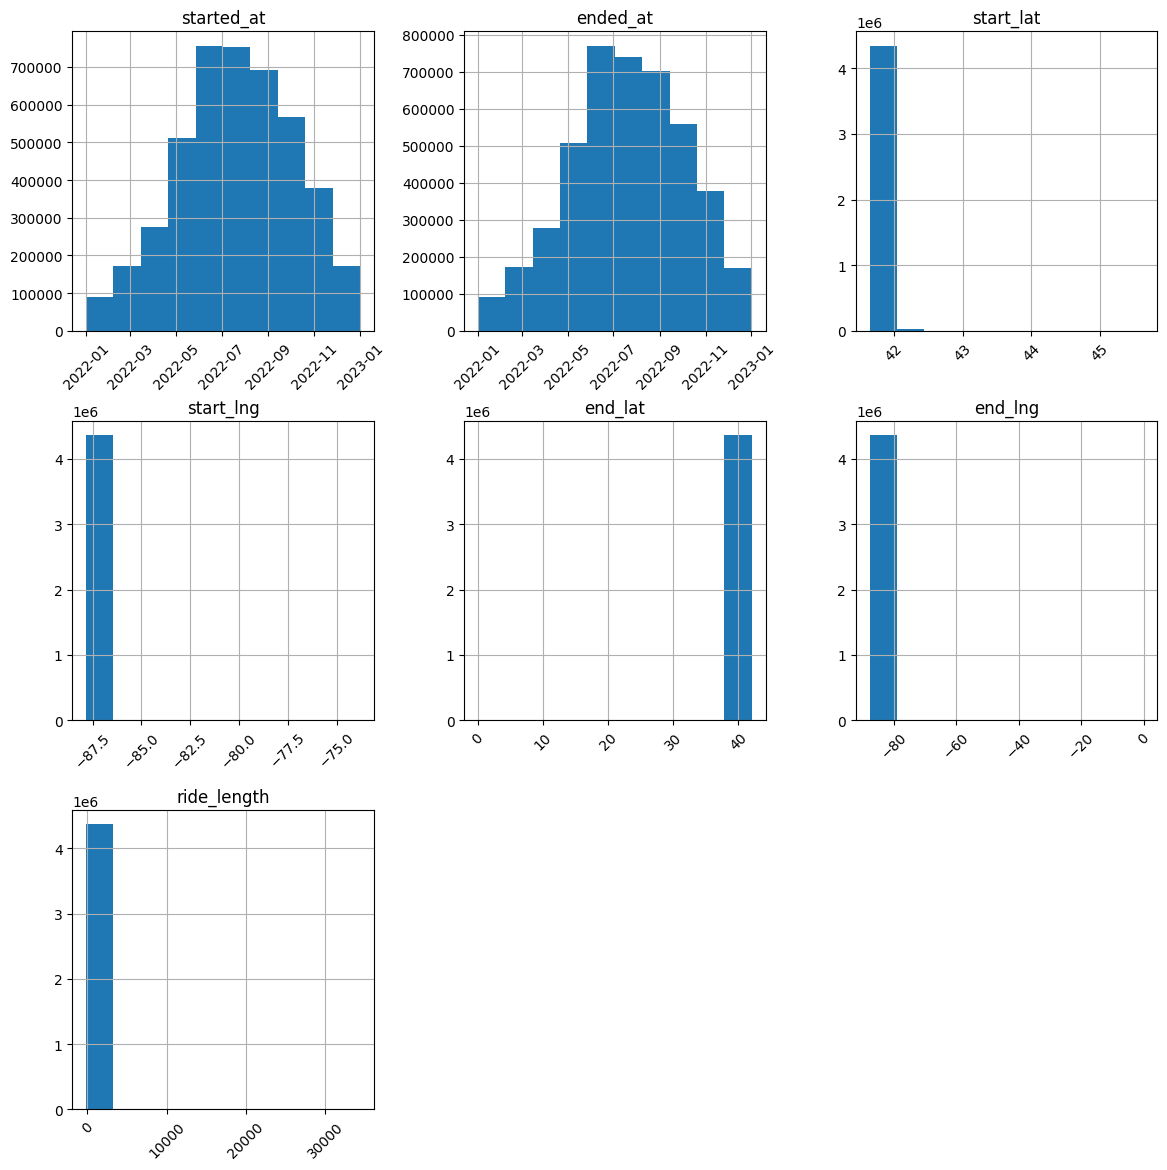

In [19]:
df.hist(figsize = (14, 14), xrot = 45)
plt.show()

Dado que se tratan de medidas de latitud, no se considera que el sesgo presentado pueda afectar de algún modo al análisis realizado. Adicionalmente, debido a que se busca trabajar con datos reales, eliminar estas mediciones podría llevar a conclusiones incorrectas. Sin embargo, se están detectando un sesgo muy significativo en la columna calculada $ride\_length$, por lo que se usará un diagrama de cajas para verificar la distribución de los cálculos.

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


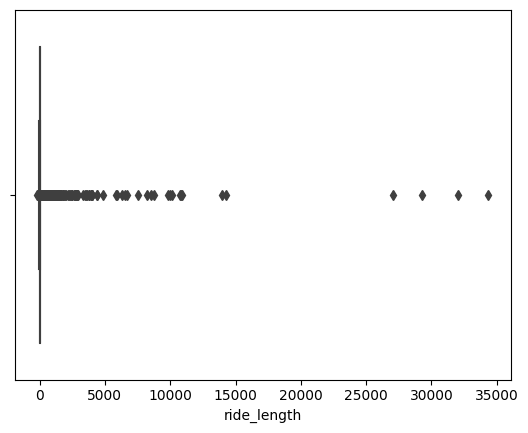

In [20]:
VariablesValoresAtipicos = ['ride_length']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=df)
  plt.show()

Tenemos valores de duración en viajes demasiado alejada a partir de 4200 en adelante. Por tanto, para evitar un análisis sesgado se eliminan esas observaciones al no resultar significativas con respecto a la cantidad de datos. Así mismo, se eliminan como verificación adicional los cálculos que hayan dado valores negativos, es decir, donde se haya registrado incorrectamente el inicio y fin del viaje (al revés, por ejemplo).

In [21]:
# Eliminamos valores menores a 0 y mayores a 4200 minutos.
df = df.loc[df['ride_length'] <= 4200]
df = df.loc[df['ride_length'] > 0]

In [22]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

c:\Users\jorje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


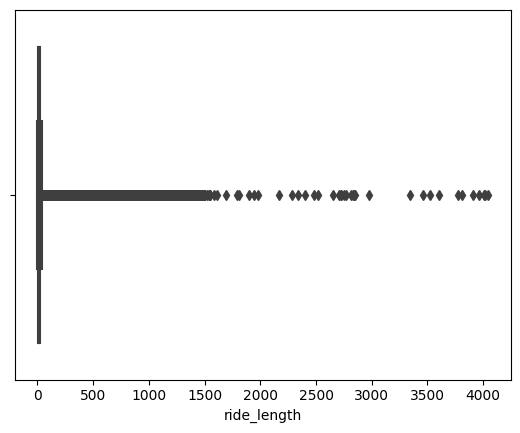

In [23]:
# Verificamos nuevamente
VariablesValoresAtipicos = ['ride_length']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=df)
  plt.show()

Ccon lo anterior, ahora continuaremos verificando las variables categóricas. En principio, obtendremos una descripción de las variables categóricas.

In [24]:
df.describe(include = 'object')

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_of_week
count,4369028,4369028,4369028,4369028,4369028,4369028,4369028,4369028
unique,4369028,3,1556,1270,1598,1281,2,7
top,C2F7DD78E82EC875,classic_bike,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member,Saturday
freq,1,2597301,71259,71259,72530,72530,2611005,705559


**Observaciones**

+ La bicicleta clásica es el tipo de transporte más común.
+ La estación más frecuente de inicio y fin es Streeter Dr & Grand Ave
+ Los miembros aparecen con mayor frecuencia.
+ El día más común de la semana en los viajes es el Sábado.

A continuación, verificaremos de forma precisa cuántos usuarios son casuales o miembros, así como el conteo de los días de la semana usados para los viajes.

In [25]:
# Cuenta casuales vs miembros
print(df["member_casual"].value_counts(), "\n")
# Cuenta los viajes hechos en cada día de la semana
print(df["day_of_week"].value_counts())

member    2611005
casual    1758023
Name: member_casual, dtype: int64 

Saturday     705559
Thursday     645852
Wednesday    616340
Friday       608813
Tuesday      607591
Sunday       598982
Monday       585891
Name: day_of_week, dtype: int64


Luego, usando seaborn mostramos histogramas para verificar la distribución de ambas variables categóricas.

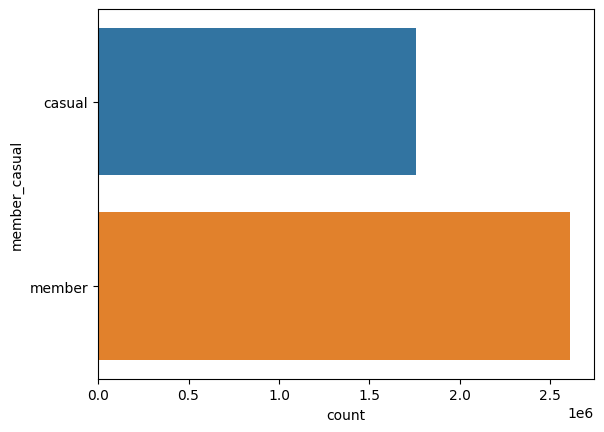

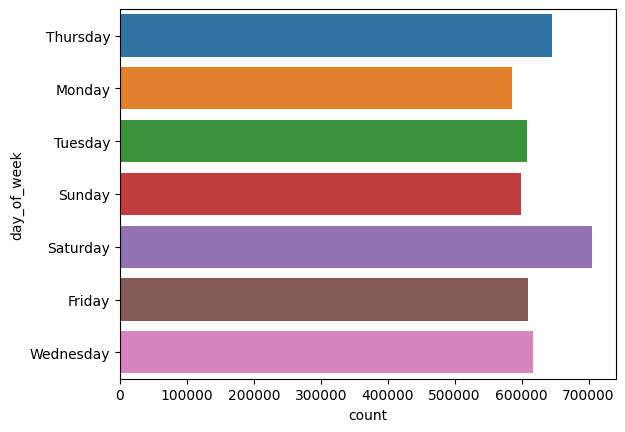

In [26]:
sns.countplot(y = df["member_casual"], data = df)
plt.show()

sns.countplot(y = df["day_of_week"], data = df)
plt.show()

Por último, verificamos las correlaciones entre las variables del dataframe.

C:\Users\jorje\AppData\Local\Temp\ipykernel_9932\410430863.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)


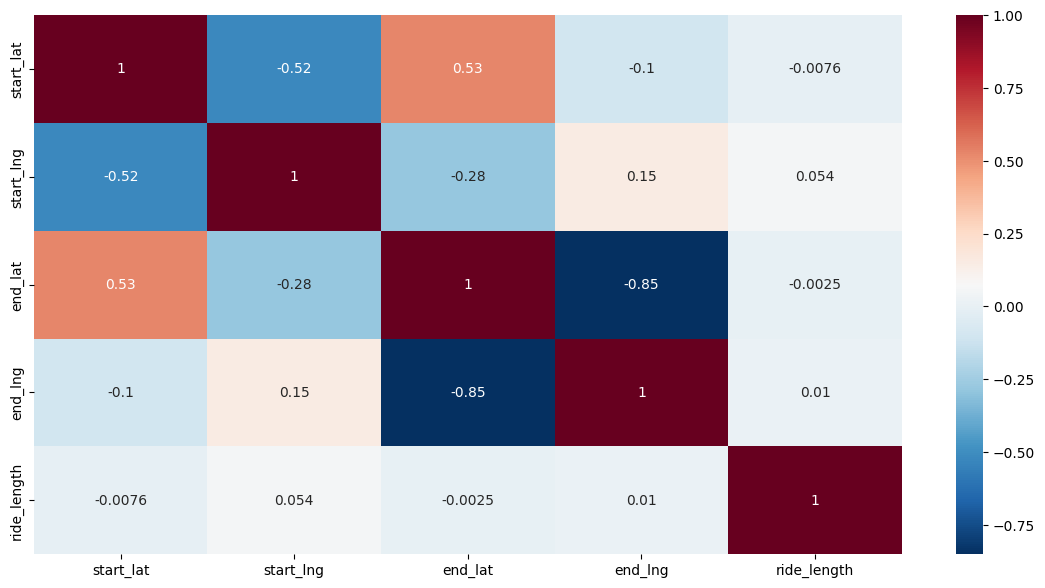

In [27]:
# Matriz de correlaciones en forma de heatmap. 
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True)
plt.show()

No hay correlaciones significativas por comentar, por lo que podemos pasar a hacia la fase de análisis.

## Análisis y Resultados

Durante el análisis exploratorio anterior recopilamos primeras impresiones acerca de los datos contenidos en cuanto a los usuarios de bicicletas y los días más comunes para realizar un viaje. Ahora, se condensará toda esa información en una serie de tablas estadísticas y gráficos para llegar a conclusiones sobre las tendencias de consumo de ambos segmentos.

Iniciamos visualizando el total de usuarios de tipo casual y de membresía:

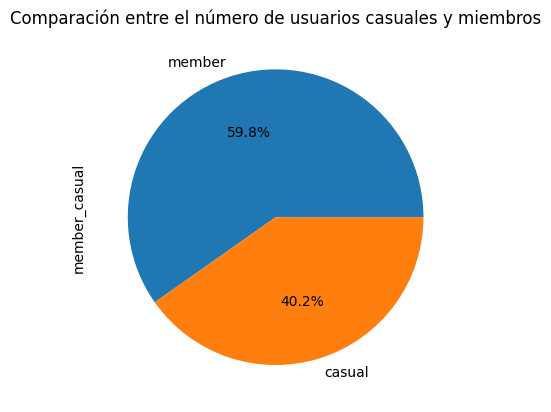

In [51]:
# Definimos la gráfica a partir de los datos
df["member_casual"].value_counts().plot.pie(autopct="%.1f%%")

# Definimos los títulos y etiquetas
plt.title('Comparación entre el número de usuarios casuales y miembros')

# Mostramos el gráfico
plt.show()

+ El 59.8% de los usuarios son miembros.
+ El 40.2% de los usuarios son casuales.

Luego, visualizamos la distribución de los días por viaje.

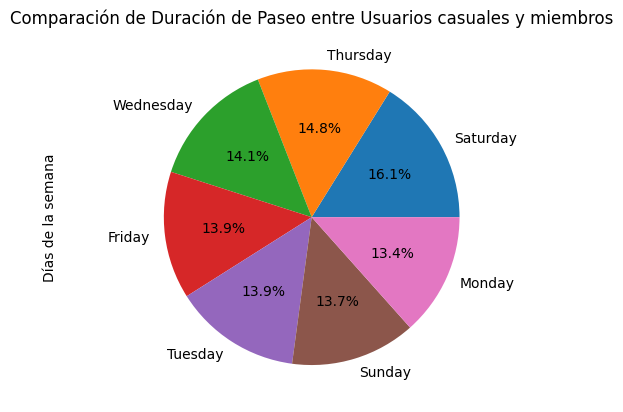

In [59]:
# Definimos la gráfica a partir de los datos
df["day_of_week"].value_counts().plot.pie(autopct="%.1f%%")

# Definimos los títulos y etiquetas
plt.title('Comparación de Duración de Paseo entre Usuarios casuales y miembros')

# Modificamos la etiqueta en el eje Y
plt.ylabel('Días de la semana', labelpad=50)

# Mostramos el gráfico
plt.show()


Como se había corroborado, el día más popular para un viaje entre ambos usuarios es en Sábado.

Después, visualizamos el tipo de transporte más común usados para cada uno de los usuarios.

rideable_type  classic_bike  docked_bike  electric_bike
member_casual                                          
casual             888728.0     174828.0       694467.0
member            1708573.0          NaN       902432.0


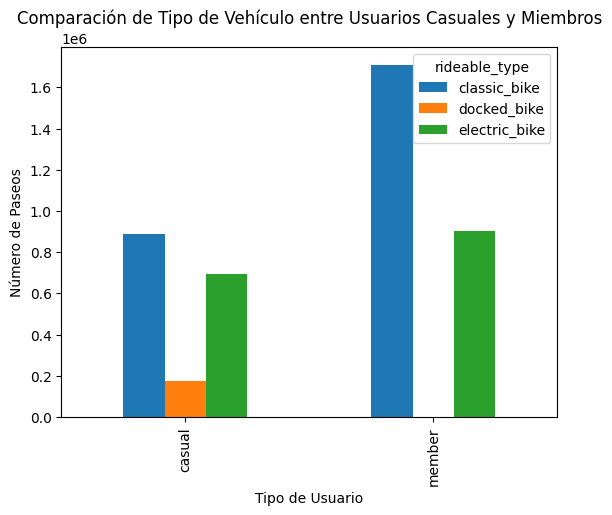

In [74]:
# Agrupamos y contamos el número de ocurrencias
grouped = df.groupby(['member_casual', 'rideable_type']).size().unstack()

print(grouped)

# Creamos el gráfico de barras apiladas
grouped.plot(kind='bar', stacked=False)

# Definimos los títulos y etiquetas
plt.title('Comparación de Tipo de Vehículo entre Usuarios Casuales y Miembros')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Número de Paseos')

# Mostramos el gráfico
plt.show()

+ Los usuarios de tipo casual han usado 3 tipos de vehículos: classic, docked y electric. 
+ Los usuarios miembros solo han usado bicicletas de tipo classic y electric.
+ En ambos casos, la bicicleta clásica es la de mayor proporción de uso entre ambas poblaciones (888,728 casuales y alrededor de 1.7 millones miembros).

Posteriormente, vamos a recuperar la media de las variables numéricas en una tabla descriptiva.


In [28]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,4.369028e+06,4.369028e+06,4.369028e+06,4.369028e+06,4.369028e+06
mean,4.190202e+01,-8.764484e+01,4.190226e+01,-8.764495e+01,1.703020e+01
std,4.256150e-02,2.577949e-02,7.098610e-02,1.212280e-01,3.260823e+01
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,1.666667e-02
25%,4.188104e+01,-8.765814e+01,4.188132e+01,-8.765862e+01,6.050000e+00
50%,4.189694e+01,-8.764182e+01,4.189766e+01,-8.764275e+01,1.060000e+01
75%,4.192877e+01,-8.762858e+01,4.192889e+01,-8.762858e+01,1.901667e+01
max,4.563503e+01,-7.379648e+01,4.206485e+01,0.000000e+00,4.045900e+03


+ Un viaje en promedio es de: 17.03 minutos.
+ El máximo registrado de un viaje es de: 4045.9 minutos (alrededor de 2.8 días)
+ A partir del análisis exploratorio anterior: el día más frecuente para salir en bicicleta es en Sábado.

Usamos una agrupación por variables categóricas para obtener la media numérica de los viajes.

In [60]:
# Agrupamos com ambas categorías
print(df.groupby('day_of_week', as_index=False).mean(), "\n")
print(df.groupby('member_casual', as_index=False).mean())

  day_of_week  start_lat  start_lng    end_lat    end_lng  ride_length
0      Friday  41.902059 -87.645331  41.902211 -87.645550    16.351075
1      Monday  41.900361 -87.644185  41.900778 -87.644523    16.517812
2    Saturday  41.905395 -87.644924  41.905565 -87.645143    20.515318
3      Sunday  41.904324 -87.644445  41.904552 -87.644780    20.541752
4    Thursday  41.901160 -87.645234  41.901508 -87.645459    15.290416
5     Tuesday  41.899884 -87.644698  41.900364 -87.644976    14.883496
6   Wednesday  41.900495 -87.644958  41.900380 -87.644117    14.725176 

  member_casual  start_lat  start_lng    end_lat    end_lng  ride_length
0        casual  41.903298 -87.643657  41.903693 -87.643970    23.829152
1        member  41.901167 -87.645628  41.901300 -87.645602    12.452382


C:\Users\jorje\AppData\Local\Temp\ipykernel_9932\2565782016.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('day_of_week', as_index=False).mean(), "\n")
C:\Users\jorje\AppData\Local\Temp\ipykernel_9932\2565782016.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('member_casual', as_index=False).mean())


De acuerdo a los datos anteriores, tenemos el siguiente gráfico de barras para la media de $ride\_length$ por cada tipo de usuario.

C:\Users\jorje\AppData\Local\Temp\ipykernel_9932\227789222.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('member_casual', as_index=False).mean()


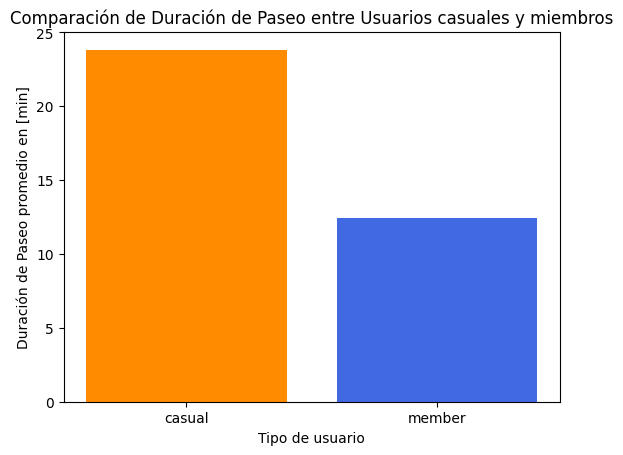

In [69]:
# Agrupamos y calculamos la media
grouped = df.groupby('member_casual', as_index=False).mean()

# Definimos los datos para el gráfico
members = grouped['member_casual']
ride_length = grouped['ride_length']

# Definimos los colores para cada grupo
colors = ['darkorange' if member == 'casual' else 'royalblue' for member in members]

# Creamos el gráfico de barras
plt.bar(members, ride_length, color = colors)

# Definimos los títulos y etiquetas
plt.title('Comparación de Duración de Paseo entre Usuarios casuales y miembros')
plt.xlabel('Tipo de usuario')
plt.ylabel('Duración de Paseo promedio en [min]')

# Mostramos el gráfico
plt.show()


Ahora, es de interés conocer el promedio, para cada día de la semana, de la duración del viaje para cada tipo de usuario; lo cual se muestra a continuación.

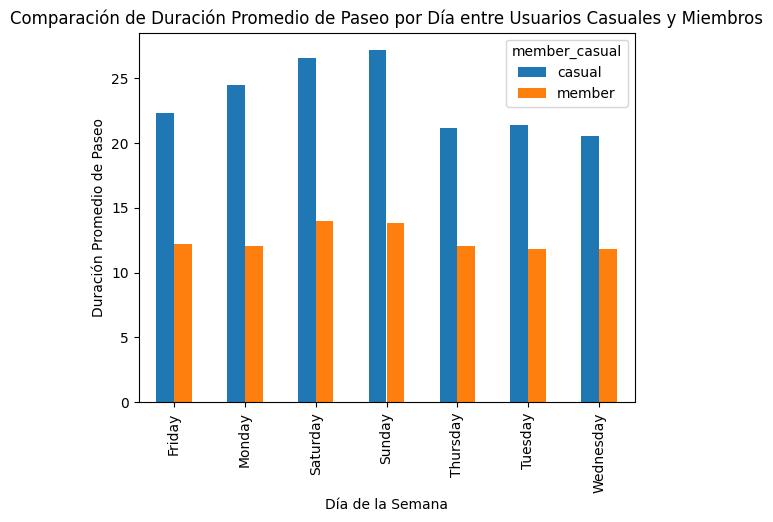

In [72]:
# Calculamos la media de ride_length agrupando por día y por miembros.
avg_ride_length_per_day_member = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean()

# Resetamos el índice
avg_ride_length_per_day_member = avg_ride_length_per_day_member.reset_index()

# Reorganizamos los datos para el gráfico: day_of_week se vuelve el índice, member_casual es la columna y ride_length los valores.
pivot_df = avg_ride_length_per_day_member.pivot(index='day_of_week', columns='member_casual', values='ride_length')

# Creamos el gráfico de barras
pivot_df.plot(kind='bar')

# Definimos los títulos y etiquetas
plt.title('Comparación de Duración Promedio de Paseo por Día entre Usuarios Casuales y Miembros')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración Promedio de Paseo')

# Mostramos el gráfico
plt.show()


Por último, realizamos un recuento del número de viajes por cada tipo de usuario a la semana con el fin de conocer los días de viaje más comunes entre cada usuario.

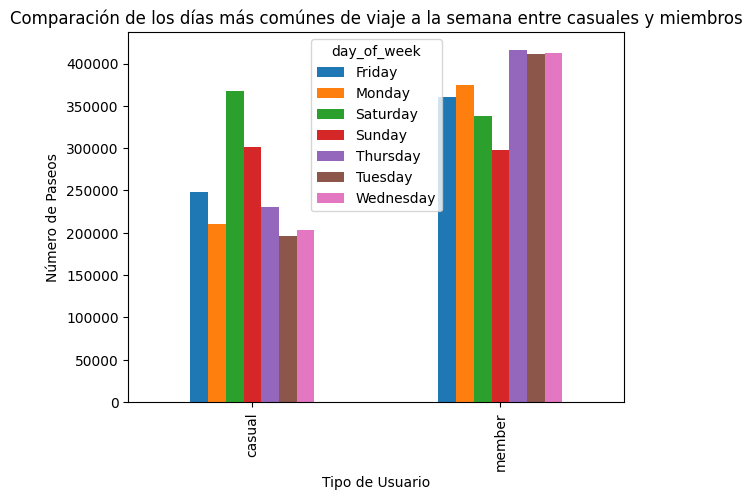

In [91]:
# Agrupamos y contamos el número de ocurrencias de los días de la semana en cada viaje por tipo de usuario
grouped = df.groupby(['member_casual', 'day_of_week']).size().unstack()

# Creamos el gráfico de barras apiladas
grouped.plot(kind='bar')

# Definimos los títulos y etiquetas
plt.title('Comparación de los días más comúnes de viaje a la semana entre casuales y miembros')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Número de Paseos')

# Mostramos el gráfico
plt.show()

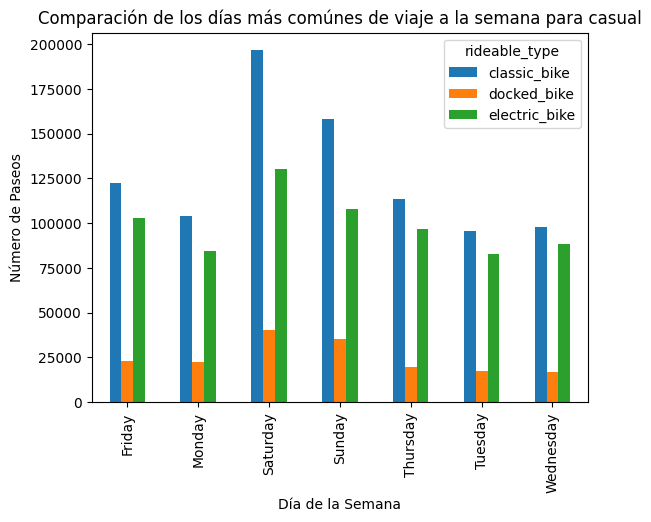

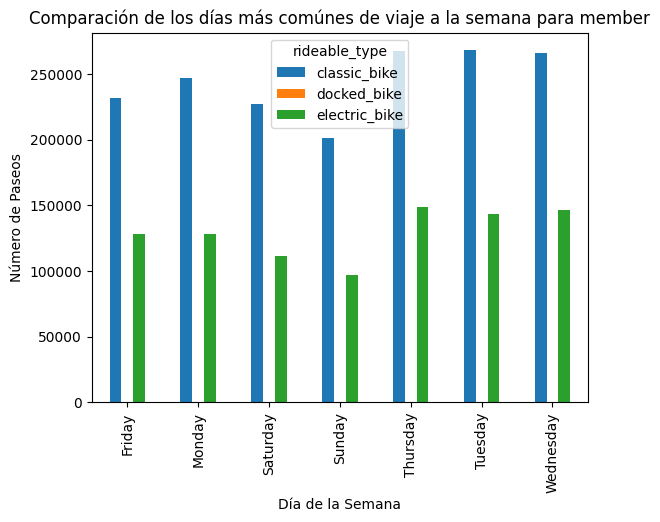

In [93]:
# Creamos el gráfico de barras para cada tipo de miembro
for member_type in ['casual', 'member']:
    grouped.loc[member_type].plot(kind='bar')
    plt.title(f'Comparación de los días más comúnes de viaje a la semana para {member_type}')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Número de Paseos')
    plt.show()


Recapitulando, obtuvimos los siguientes insights de nuestros datos:

+ La proporción de usuarios que prefieren bicicletas clásicas es superior en ambos grupos, sin embargo, se observa que esta proporción contra los otros vehículos es menor en los ciclistas casuales, es decir, también optan por usar bicicletas eléctricas o docked.

+ Los ciclistas casuales gastan un promedio de 23.82 minutos en cada viaje, mientras que los ciclistas miembros tienen un promedio de uso marcadamente menor de 12.45 minutos.

+ La distribución de minutos de viaje por día tiene una particularidad: se observa que en Viernes, Sábado, Domingo y Lunes los ciclistas casuales presentan una tendencia a aumentar el tiempo de sus viajes; lo que podría a priori indicar que en fines de semana se encuentran mucho más activos (en el resto de días su actividad cae marcadamente).

+ Por otra parte, los miembros presentan una distribución relativamente uniforme en el tiempo promedio de sus viajes; aumentando ligeramente entre Sábado y Domingo.

+ Posteriormente, a través de la comparación de los días de viaje entre ambos miembros se observa que, efectivamente, los miembros casuales muestran un notorio nivel de actividad en Viernes, Sábado y Domingo; disminuyendo en el resto de días de la semana. Es decir, es posible que utilicen las bicicletas principalmente con fines recreativos.

+ En contraste, los miembros tienden a usar más las bicicletas entre semana que en fines de semana, lo que sugiere que estos la utilizan principalmente para sus actividades cotidianas y de transporte.

+ La distribución del tipo de vehículo preferido se mantiene a lo largo de toda la semana en ambos grupos, donde la bicicleta clásica resulta la opción predilecta para ambos grupos.


## Actuar

 + Conclusión: los usuarios casuales destinan sus viajes principalmente a motivos recreativos, mientras que los miembros usan las bicicletas principalmente para traslados entre semana.

 + Sugerencias: generar una campaña de marketing destinada específicamente hacia los usuarios casuales, apelando a lo atractivo del servicio para fines recreativos y ofreciendo una subscripción específica para esta clase de usuarios; que podría contar con promociones enfocadas a eso días en específicos. Incluso, podría ser una buena opción asociarse con empresas ubicadas en zonas cercanas a parques recreativos o rutas de ciclismo para ofrecen beneficios dirigidos a esos miembros en ciertos comercios y, de ese modo, incentivar aún más a los usuarios casuales a adquirir una membresía.